#### <h1 align="center"><font color="00308F" size=110>Systems of Equations</font></h1>

This notebook supplements the lesson 5 course notes on vectors, matrices, and systems of equations.

Let's start by setting up our environment and importing what we need.  

In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [99]:
import numpy as np
import matplotlib
from IPython.html.widgets import interact
from IPython.display import Image
try:
    %matplotlib inline
except:
    # not in notebook
    pass

LECTURE = False
if LECTURE:
    size = 20
    matplotlib.rcParams['figure.figsize'] = (10, 6)
    matplotlib.rcParams['axes.labelsize'] = size
    matplotlib.rcParams['axes.titlesize'] = size
    matplotlib.rcParams['xtick.labelsize'] = size * 0.6
    matplotlib.rcParams['ytick.labelsize'] = size * 0.6
import matplotlib.pyplot as plt

C:\Users\James\Anaconda2\lib\site-packages\IPython\html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


## Minors, Cofactors, Determinants

In the first part of class, we learned about the method of cofactors as a method to calculate the determininant and inverse of a matrix.  Recall that the cofactor of A is given by:

$$ C_{ij}=(-1)^{i+j}M_{ij}$$

where $M_{ij}$ deletes the i$^{th}$ row and j$^{th}$ column.

Let's code a funciton to compute the cofactor:

For the sake of coding time, we will use the built-in numpy det solver to calculate minor det only. We could develop a function that calculated a 2x2 and/or 3x3 matrix determinant and recursively use the method of cofactors to get to that size of matrix, but that exercise is left to outside of class.

In [49]:
from numpy.linalg import det

#! Define a function to calculate the cofactor

The cofactor can then be used to calculate the determinant from the laplace expansion

\begin{align*}
\text{det}(A) &= \sum_{j=1}^n a_{ij} C_{ij} \text{ for any i} \in \{1,...,n\} \\
%
&= \sum_{i=1}^n a_{ij} C_{ij} \text{ for any j} \in \{1,...,n\}
\end{align*}

Now, let's write  afunction to calculate the det of an arbitrary matrix A.

In [50]:
#! Define function to calculate determinant of arbitrary size with optional specifications for the row
#! on which to perform the Laplace expansion

Let's test the performance of our functions.  To compare, let's use the [numpy linear algebra package's det method](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.linalg.det.html).

Let's first compare using a hard coded matrix.  Then let's generate a matrix of random numbers to compare.

In [56]:
example = np.array([[1, 4, 7], [3, 0, 5], [-1, 9, 11]])

#! Compare your mat_det to the python built - in using the example matrix

-8.0
-8.0


In [57]:
#! Generate random number array of size n by n where 10<n<=100

#! Compare the your cofactor method to the built in

6.26011767242e+25
6.26011767242e+25


Try running the above code with larger arrays.  What happens?  

This is the reason for the iterative methods and discretization schemes discussed previously in lesson 4.  With that caveat in mind, let's continue exploring matrix solutions to systems of equations.  

Recall, that the inverse can be calculated as:

$$ A^{-1} = \frac{1}{\text{det}(A)}C^T$$

Code up a function to calculate the inverse of a matrix:

In [58]:
#! Use cofactors to get the inverse

And let's compare our results using our mehtod and a python built-in:

In [70]:
#! Use previous random array and example array to compare

Example Array:
None
Random Array:
None


## Reminder: Laplace (Heat/Diffusion) equation in 1D

From lesson 4, we looked at the diffusion equation.  To show how the finite difference method could be used to solve PDEs we first solved the 1D, time dependent problem.  Here, we will bring it back to an ODE by reducing the heat equation to the Laplace equation by removing the time dependence to look at the system in steady state - i.e. once the system has come to equilibrium. 

\begin{equation}
T''(x) = 0, \quad \text{with boundary conditions for}\quad T(x).
\end{equation}

We will first consider simple fixed boundary conditions for the problem.

We consider the an inifinitely thin rod of length $L=0.05$ m, with temperature held constant at $0 \deg$ at one end and  $100 \deg$ at the other:

\begin{align}
T''(x) &= 0, &   T(0) &= 0 \deg, &  T(L) &= 100 \deg.
\end{align}

Discretizing gives us:

\begin{align}
T''(x) &= \frac{T(x - h) - 2 T(x) + T(x + h)}{h^2}, &   T(0) &= 0 \deg, &  T(L) &= 100 \deg
\end{align}

at each point on the rod, where the mesh separation is $h$.

### One unknown mesh point

\begin{equation}
\frac{T_{-1} -2 T_0 + T_1}{h^2}  = 0,
\end{equation}

where $h = L/2$. Since $T_{-1} = 0 \deg$ and $T_1 = 100 \deg$, we have

\begin{equation}
T_0 = \frac{T_{-1} + T_1}{2} = 50 \deg
\end{equation}

This is what we expect because when the system is in equilibrium, the temperature should vary linearly along the rod from $0 \deg$ at $x=0$ to $100 \deg$ at $x=L$.

### Two unknown mesh points

If we discretize the Laplace equation at the two unknown mesh points $T_0$ and $T_1$ using the first central approximation for the second derivative $T''$, we get

\begin{equation}
\left\{\begin{aligned}
\frac{T_{-1} -2 T_0 + T_1}{h^2}  = 0 \\
\frac{T_{0} -2 T_1 + T_2}{h^2}  = 0,
\end{aligned}\right.
\end{equation}

where $h = L/3$. If we express our unkowns $T_0$ and $T_1$ in terms of our boundary conditions $T_{-1} = 0 \deg$ and $T_2 = 100 \deg$, we get

\begin{equation}
\left\{\begin{aligned}
-2 T_0 + T_1  = -T_{-1} \\
T_{0} -2 T_1  = -T_2,
\end{aligned}\right.
\end{equation}

or in matrix form

\begin{equation}
\begin{pmatrix}
-2 & 1 \\ 1 & -2
\end{pmatrix}
\begin{pmatrix}
T_{0} \\ T_1
\end{pmatrix}
=
\begin{pmatrix}
-T_{-1} \\ - T_2
\end{pmatrix}.
\end{equation}

Inverting the matrix yields

\begin{equation}
\begin{pmatrix}
T_{0} \\ T_1
\end{pmatrix}
=
\frac{1}{3}\left(\matrix{ {-2} & {-1} \cr {-1} & {-2} } \right)
\begin{pmatrix}
-T_{-1} \\ - T_2
\end{pmatrix}
= \frac{1}{3}
\begin{pmatrix}
2 T_{-1} + T_{2} \\
T_{-1} + 2T_{2}
\end{pmatrix}
=
\begin{pmatrix}
33.333333 \deg \\
66.666666 \deg
\end{pmatrix}
\end{equation}

Again, we see that the temperature varies linearly through the rod.

### Three unknown mesh points

For 3 unkown mesh points $T_0$, $T_1$, and $T_2$, we get the system of equations

\begin{equation}
\left\{\begin{aligned}
&\phantom{-2}T_{-1} -2 T_0  + \phantom{2}T_1 \phantom{ -2 T_2 + 2T_3} = 0 \\
&\phantom{-2T_{-1} -2} T_0  - 2 T_1 + \phantom{2}T_2 \phantom{ + 2T_3} = 0 \\
&\phantom{-2T_{-1} -2 T_0  - 2} T_1 - 2 T_2 + T_3 = 0,
\end{aligned}\right.
\end{equation}

or, in matrix form,

\begin{equation}
\begin{pmatrix}
-2 & 1 & 0 \\
1 & -2 & 1 \\
0 & 1 & -2
\end{pmatrix}
\begin{pmatrix}
T_{0} \\ T_1 \\ T_2
\end{pmatrix}
=
\begin{pmatrix}
-T_{-1} \\ 0 \\ - T_3
\end{pmatrix}.
\end{equation}

Solving this gives

\begin{equation}
\begin{pmatrix}
T_{0} \\ T_1 \\ T_2
\end{pmatrix}
=
\frac{1}{4}
\begin{pmatrix}
{-3 } & {-2} & {-1 } \\ {-2} & -1 & {-2} \\ {-1 } & {-2} & {-3 }
\end{pmatrix}
\begin{pmatrix}
-T_{-1} \\ 0 \\ - T_3
\end{pmatrix}
=
\frac{1}{4}
\begin{pmatrix}
3T_{-1} + T_3 \\ 2 T_{-1} + 2 T_3 \\ - T_{-1} + 3 T_3
\end{pmatrix}
=
\begin{pmatrix}
25  \\ 50 \\ 75
\end{pmatrix}
 \deg.
\end{equation}


### Summary 

\begin{equation}
T''(x) = 0,
\end{equation}

with boundary conditions $T(0) = T_0$ and $T(L) = T_L$, yields a linear system of equation of the form

\begin{equation}
A X = B,
\end{equation}

where $A$ is a matrix describing the Laplace operator, $X$ is the vector of unknowns describing the temperature at the inner mesh points, and $B$ is a vector containing the boundary conditions. This system can be solved analytically or symbolically (for small number of unkowns), or using direct or iterative methods for large number of unkowns.

## Solving with Sympy or Scipy

Note that to solve the above linear system of equations we can use the iterative methods presented in lesson 4. Here, we explore using linear algebra to solve the system with few mesh points.

### Sympy

For such a short system, we can use [SymPy](http://www.sympy.org/en/index.html) to inverse the system symbolically.

*Note: This may not run on AFIT's system.  If not, the following code can be copied into the SymPy live shell at: http://docs.sympy.org/0.7.2/modules/matrices/matrices.html 

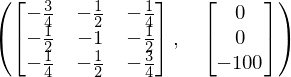

In [90]:
from sympy import *
init_printing()  # Pretty printing with sympy

# Boundary temperatures
Tm1 = 0
T3  = 100
B = Matrix([[-Tm1], [0], [-T3]])

# Matrix to be inverted
A = Matrix([[-2, 1, 0],
     [1, -2, 1],
     [0, 1, -2]])

Ainv = Matrix(A)**(-1)
Ainv, B

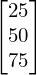

In [91]:
# Solve the system and get the temperatures
Ainv * b

### SciPy solution

Another option is to use [SciPy's linalg module](https://docs.scipy.org/doc/scipy/reference/linalg.html) for a numerical solution.

In [92]:
import scipy.linalg as linalg

A = np.array([[-2, 1, 0],
     [1, -2, 1],
     [0, 1, -2]])
B = np.array([[-Tm1], [0], [-T3]])

linalg.solve(A, B)

array([[ 25.],
       [ 50.],
       [ 75.]])